In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from copy import deepcopy
import seaborn as sns


sns.set(style="whitegrid", color_codes=True)
matplotlib.style.use('ggplot')
pd.options.display.max_columns = 100

In [2]:
data = pd.read_csv("earthquake_data.csv")

In [3]:
data.shape

(1013, 11)

In [4]:
data

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?","Do you think the ""Big One"" will occur in your lifetime?",Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic
5,Not at all worried,Not at all worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",East North Central
6,Very worried,Not at all worried,Yes,"Yes, one or more major ones",Yes,NaN,NaN,NaN,NaN,NaN,NaN
7,Not at all worried,Not at all worried,No,No,No,Not so familiar,Not at all familiar,18 - 29,Male,Prefer not to answer,South Atlantic
8,Not at all worried,Not at all worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,Prefer not to answer,East North Central
9,Not at all worried,Not at all worried,No,No,No,Not at all familiar,Not so familiar,18 - 29,Male,"$10,000 to $24,999",East North Central


In [5]:
for i in range(len(list(data))): print("{}: {}".format(i, data.columns[i]))

0: In general, how worried are you about earthquakes?
1: How worried are you about the Big One, a massive, catastrophic earthquake?
2: Do you think the "Big One" will occur in your lifetime?
3: Have you ever experienced an earthquake?
4: Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?
5: How familiar are you with the San Andreas Fault line?
6: How familiar are you with the Yellowstone Supervolcano?
7: Age
8: What is your gender?
9: How much total combined money did all members of your HOUSEHOLD earn last year?
10: US Region


Usuwam cudzysłów z nazwy kolumny, żeby nie bruździł.

In [6]:
data = data.rename(index=str, columns={
        "Do you think the \"Big One\" will occur in your lifetime?":
        "Do you think the Big One will occur in your lifetime?"
    })

# Preprocessing

***

Generalnie dane wyglądają bardzo przyzwoicie i niewiele będzie z nimi nieprzyjemności. Zacznę od analizy brakujących danych.

In [7]:
data[data.isnull().any(axis=1)].shape

(35, 11)

Mamy tylko 35 wierszy, w których NaNy w ogóle występują. Na 1013 wszystkich rekordów to naprawdę niewiele.

In [8]:
data[data.isnull().any(axis=1)]

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
6,Very worried,Not at all worried,Yes,"Yes, one or more major ones",Yes,NaN,NaN,NaN,NaN,NaN,NaN
12,Extremely worried,Very worried,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Extremely worried,Extremely worried,No,No,No,Not so familiar,Not so familiar,18 - 29,Male,"$10,000 to $24,999",NaN
32,Not at all worried,Somewhat worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Somewhat familiar,30 - 44,Male,"$25,000 to $49,999",NaN
33,Not so worried,Not so worried,Yes,No,No,Not so familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",NaN
40,Somewhat worried,Somewhat worried,Yes,"Yes, one or more major ones",No,Not at all familiar,Not at all familiar,30 - 44,Male,"$25,000 to $49,999",NaN
87,Not so worried,Somewhat worried,Yes,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$0 to $9,999",NaN
90,Somewhat worried,Somewhat worried,No,No,Yes,Somewhat familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",NaN
142,Somewhat worried,Somewhat worried,Yes,"Yes, one or more minor ones",Yes,Somewhat familiar,Somewhat familiar,18 - 29,Male,"$75,000 to $99,999",NaN
144,Very worried,Very worried,Yes,"Yes, one or more major ones",No,Not so familiar,Not at all familiar,30 - 44,Male,"$50,000 to $74,999",NaN


Sprawdźmy ile jest rekordów, w których brakuje danych w połowie kolumn lub więcej. Te na pewno wywalam.

In [9]:
data[data[~data.isnull()].count(axis=1) < 7].shape[0]

12

In [10]:
data[data[~data.isnull()].count(axis=1) < 7]

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
6,Very worried,Not at all worried,Yes,"Yes, one or more major ones",Yes,NaN,NaN,NaN,NaN,NaN,NaN
12,Extremely worried,Very worried,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Not at all worried,Not at all worried,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Very worried,Somewhat worried,No,"Yes, one or more minor ones",No,NaN,NaN,NaN,NaN,NaN,NaN
358,Extremely worried,Extremely worried,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN
395,Very worried,Extremely worried,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,Somewhat worried,Somewhat worried,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659,Somewhat worried,Somewhat worried,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN
737,Somewhat worried,Somewhat worried,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
872,Somewhat worried,Somewhat worried,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A pozostałych z brakującymi danymi:

In [11]:
data[(data[~data.isnull()].count(axis=1) >= 7) & (data[~data.isnull()].count(axis=1) < 11)].shape[0]

23

In [12]:
data[(data[~data.isnull()].count(axis=1) >= 7) & (data[~data.isnull()].count(axis=1) < 11)]

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
25,Extremely worried,Extremely worried,No,No,No,Not so familiar,Not so familiar,18 - 29,Male,"$10,000 to $24,999",NaN
32,Not at all worried,Somewhat worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Somewhat familiar,30 - 44,Male,"$25,000 to $49,999",NaN
33,Not so worried,Not so worried,Yes,No,No,Not so familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",NaN
40,Somewhat worried,Somewhat worried,Yes,"Yes, one or more major ones",No,Not at all familiar,Not at all familiar,30 - 44,Male,"$25,000 to $49,999",NaN
87,Not so worried,Somewhat worried,Yes,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$0 to $9,999",NaN
90,Somewhat worried,Somewhat worried,No,No,Yes,Somewhat familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",NaN
142,Somewhat worried,Somewhat worried,Yes,"Yes, one or more minor ones",Yes,Somewhat familiar,Somewhat familiar,18 - 29,Male,"$75,000 to $99,999",NaN
144,Very worried,Very worried,Yes,"Yes, one or more major ones",No,Not so familiar,Not at all familiar,30 - 44,Male,"$50,000 to $74,999",NaN
176,Very worried,Extremely worried,No,"Yes, one or more minor ones",No,Not so familiar,Not so familiar,30 - 44,Male,"$10,000 to $24,999",NaN
182,Not at all worried,Not at all worried,Yes,"Yes, one or more minor ones",Yes,Not at all familiar,Not at all familiar,30 - 44,Male,Prefer not to answer,NaN


Czyli jedyną dziurawą kolumną jest ostatnia ("US Region"). Gdyby było więcej dziur, postarałbym się jakoś je pouzupełniać (może np. inferować region na podstawie pytania 3., 9., albo obydwu na raz?). Ponieważ jednak jest ich tak malutko, pozwolę sobie po prostu się ich pozbyć.

In [13]:
data.drop(data.index[list(data[data.isnull().any(axis=1)].index)], inplace=True)

/usr/lib/python3.5/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


In [14]:
data.shape

(978, 11)

In [15]:
data.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic


In [16]:
for i in range(len(list(data))): print("{}: {}".format(i, data.columns[i]))

0: In general, how worried are you about earthquakes?
1: How worried are you about the Big One, a massive, catastrophic earthquake?
2: Do you think the Big One will occur in your lifetime?
3: Have you ever experienced an earthquake?
4: Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?
5: How familiar are you with the San Andreas Fault line?
6: How familiar are you with the Yellowstone Supervolcano?
7: Age
8: What is your gender?
9: How much total combined money did all members of your HOUSEHOLD earn last year?
10: US Region


Mamy same cechy kategoryczne, w tym porządkowe (0,1,3,5,6,7,9) oraz binarne (2,4,8) i jedną nominalną. Nominalną rozbijemy na dummy variables, binarne zakodujemy zerami i jedynkami, a porządkowe liczbami naturalnymi zgodnie z porządkiem.

In [17]:
for column in data:
    data[column] = data[column].astype('category')
    print(data[column].describe(), "\n")

count                    978
unique                     5
top       Not at all worried
freq                     351
Name: In general, how worried are you about earthquakes?, dtype: object 

count                    978
unique                     5
top       Not at all worried
freq                     329
Name: How worried are you about the Big One, a massive, catastrophic earthquake?, dtype: object 

count     978
unique      2
top        No
freq      560
Name: Do you think the Big One will occur in your lifetime?, dtype: object 

count                             978
unique                              3
top       Yes, one or more minor ones
freq                              471
Name: Have you ever experienced an earthquake?, dtype: object 

count     978
unique      2
top        No
freq      766
Name: Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?, dtype: object 

count              

Zmieniam typ danych na kategoryczne i porządkuję tam, gdzie to odpowiednie. Niestety nie widzę żadnego sposobu, żeby zrobić to automatycznie, więc układam im kolejność ręcznie.

In [18]:
data["In general, how worried are you about earthquakes?"].unique()

[Not at all worried, Somewhat worried, Not so worried, Very worried, Extremely worried]
Categories (5, object): [Not at all worried, Somewhat worried, Not so worried, Very worried, Extremely worried]

In [19]:
data["In general, how worried are you about earthquakes?"].cat.reorder_categories(
    ['Not at all worried',
     'Not so worried',
     'Somewhat worried',
     'Very worried',
     'Extremely worried'],
    ordered=True, inplace=True )

In [20]:
data["How worried are you about the Big One, a massive, catastrophic earthquake?"].unique()

[Not so worried, Very worried, Somewhat worried, Not at all worried, Extremely worried]
Categories (5, object): [Not so worried, Very worried, Somewhat worried, Not at all worried, Extremely worried]

In [21]:
data["How worried are you about the Big One, a massive, catastrophic earthquake?"].cat.reorder_categories(
    ['Not at all worried',
     'Not so worried',
     'Somewhat worried',
     'Very worried',
     'Extremely worried'],
    ordered=True, inplace=True )

In [22]:
data["Do you think the Big One will occur in your lifetime?"].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [23]:
data["Do you think the Big One will occur in your lifetime?"].cat.reorder_categories(
    ['No',
     'Yes'],
    ordered=False, inplace=True )

In [24]:
data["Have you ever experienced an earthquake?"].unique()

[Yes, one or more minor ones, No, Yes, one or more major ones]
Categories (3, object): [Yes, one or more minor ones, No, Yes, one or more major ones]

In [25]:
data["Have you ever experienced an earthquake?"].cat.reorder_categories(
    ['No',
     'Yes, one or more minor ones',
     'Yes, one or more major ones'],
    ordered=True, inplace=True )

In [26]:
data["Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?"].unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [27]:
data["Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?"].cat.reorder_categories(
    ['No',
     'Yes'],
    ordered=False, inplace=True )

In [28]:
data["How familiar are you with the San Andreas Fault line?"].unique()

[Somewhat familiar, Not at all familiar, Very familiar, Not so familiar, Extremely familiar]
Categories (5, object): [Somewhat familiar, Not at all familiar, Very familiar, Not so familiar, Extremely familiar]

In [29]:
data["How familiar are you with the San Andreas Fault line?"].cat.reorder_categories(
    ['Not at all familiar',
     'Not so familiar',
     'Somewhat familiar',
     'Very familiar',
     'Extremely familiar'],
    ordered=True, inplace=True )

In [30]:
data["How familiar are you with the Yellowstone Supervolcano?"].unique()

[Not so familiar, Not at all familiar, Somewhat familiar, Extremely familiar, Very familiar]
Categories (5, object): [Not so familiar, Not at all familiar, Somewhat familiar, Extremely familiar, Very familiar]

In [31]:
data["How familiar are you with the Yellowstone Supervolcano?"].cat.reorder_categories(
    ['Not at all familiar',
     'Not so familiar',
     'Somewhat familiar',
     'Very familiar',
     'Extremely familiar'],
    ordered=True, inplace=True )

In [32]:
data["Age"].unique()

[18 - 29, 30 - 44, 45 - 59, 60]
Categories (4, object): [18 - 29, 30 - 44, 45 - 59, 60]

In [33]:
data["Age"].cat.reorder_categories(
    ['18 - 29',
     '30 - 44',
     '45 - 59',
     '60'],
    ordered=True, inplace=True )

In [34]:
data["What is your gender?"].unique()

[Male, Female]
Categories (2, object): [Male, Female]

In [35]:
data["What is your gender?"].cat.reorder_categories(
    ['Male',
     'Female'],
    ordered=False, inplace=True )

In [36]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].unique()

[Prefer not to answer, $75,000 to $99,999, $10,000 to $24,999, $25,000 to $49,999, $200,000 and up, ..., $0 to $9,999, $100,000 to $124,999, $175,000 to $199,999, $125,000 to $149,999, $150,000 to $174,999]
Length: 11
Categories (11, object): [Prefer not to answer, $75,000 to $99,999, $10,000 to $24,999, $25,000 to $49,999, ..., $100,000 to $124,999, $175,000 to $199,999, $125,000 to $149,999, $150,000 to $174,999]

In [37]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].cat.reorder_categories(
    ['Prefer not to answer',
     '$0 to $9,999',
     '$10,000 to $24,999',
     '$25,000 to $49,999',
     '$50,000 to $74,999',
     '$75,000 to $99,999',
     '$100,000 to $124,999',
     '$125,000 to $149,999',
     '$150,000 to $174,999',
     '$175,000 to $199,999',
     '$200,000 and up'],
    ordered=True, inplace=True )

Okej, mamy więc posprzątane i uporządkowane dane. Zakoduję je teraz liczbowo, żeby nadawały się do analizy.

In [60]:
X = deepcopy(data)
names = list(data.columns)

for column in X:
    X[column] = X[column].cat.codes

X = pd.get_dummies(X, columns=["US Region"])

In [39]:
X.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region_0,US Region_1,US Region_2,US Region_3,US Region_4,US Region_5,US Region_6,US Region_7,US Region_8
0,0,1,0,1,0,2,1,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,3,0,1,0,0,0,0,0,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,0,1,0,3,2,0,0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,1,0,3,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,1,1,1,0,2,4,0,0,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Eksploracja

***

Zanim wezmę się za klastrowanie narysuję parę wykresów i poszukam jakichś ciekawych zależności.

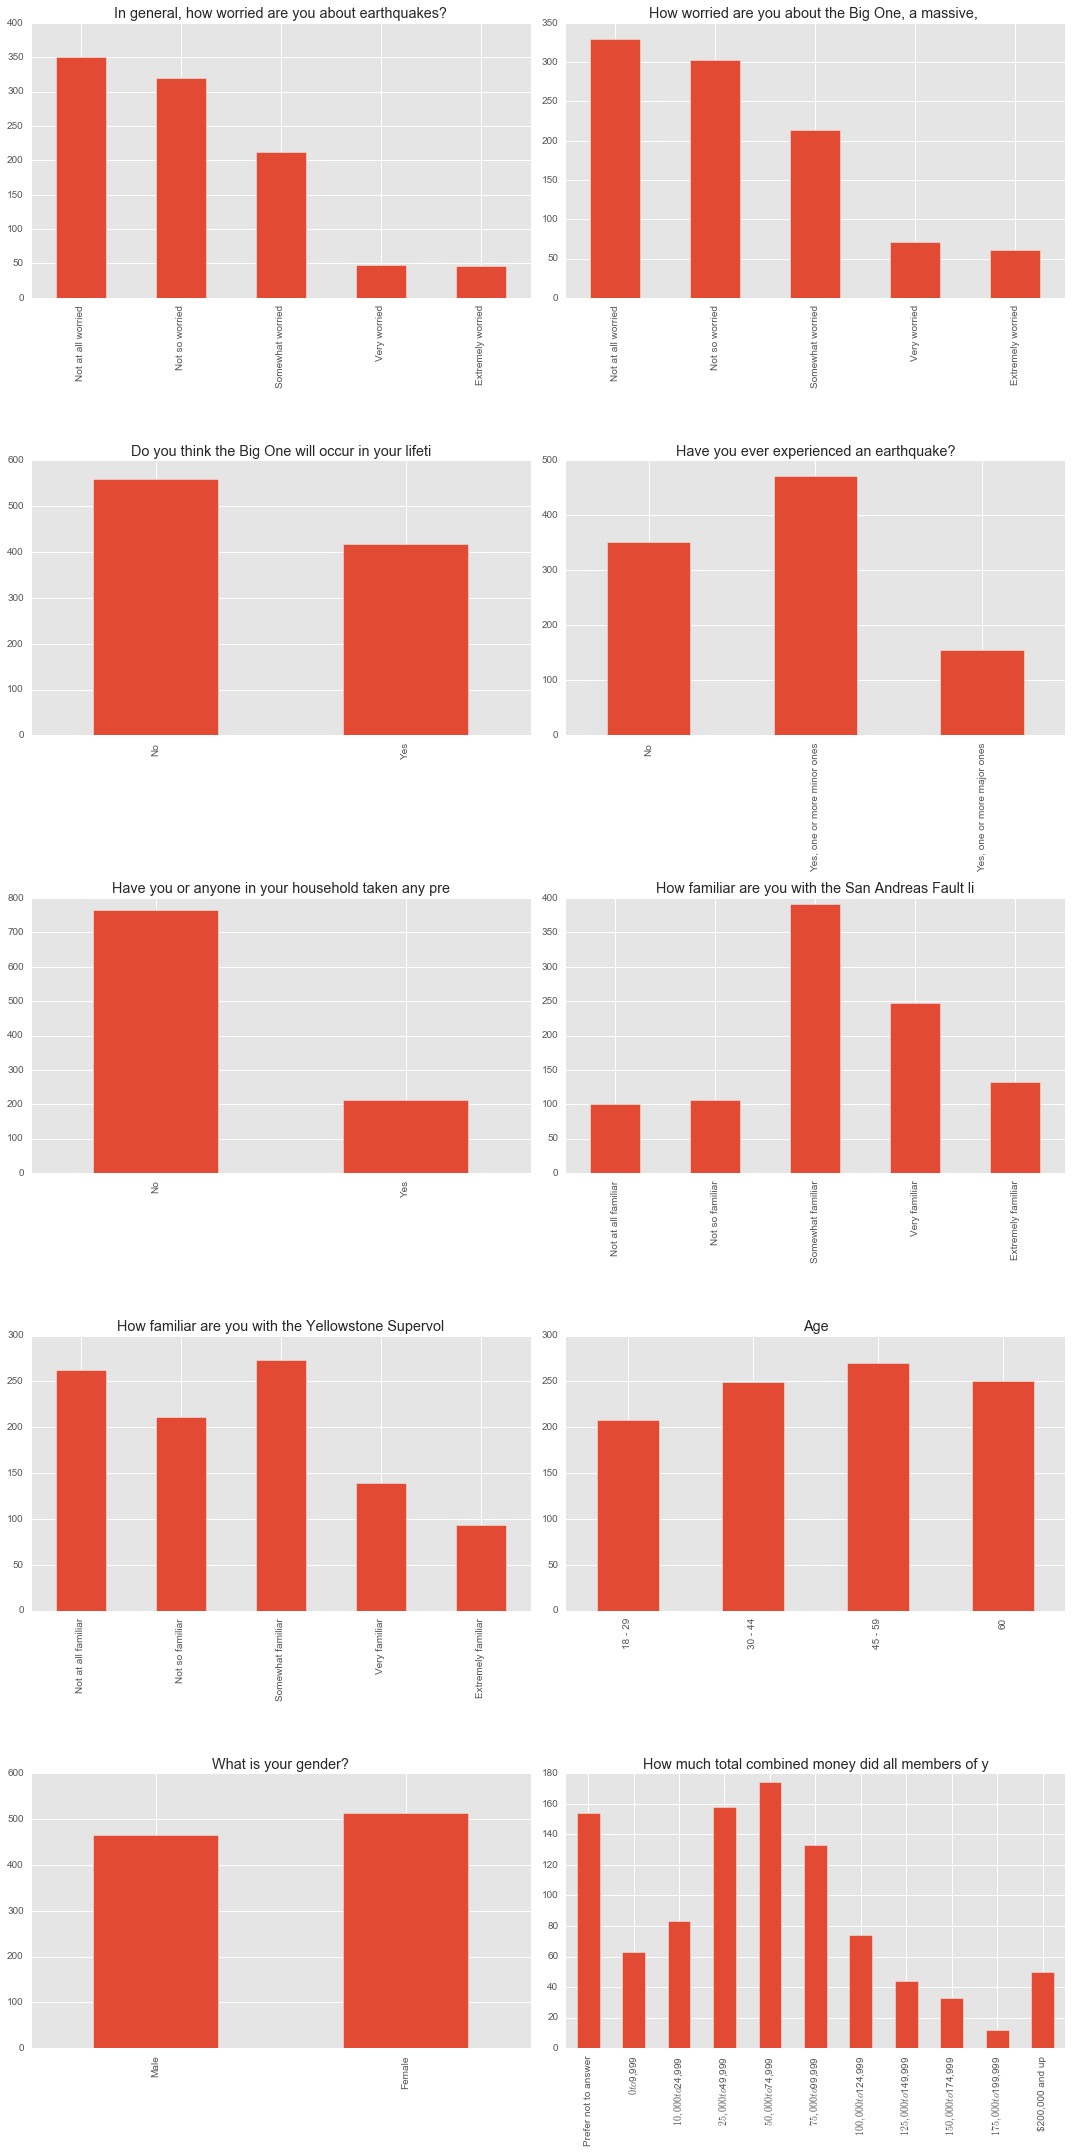

In [205]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

data.iloc[:,0].value_counts().sort_index().plot(kind='bar', ax=axes[0][0])
axes[0][0].set_title(names[0][:50])
data.iloc[:,1].value_counts().sort_index().plot(kind='bar', ax=axes[0][1])
axes[0][1].set_title(names[1][:50])
data.iloc[:,2].value_counts().sort_index().plot(kind='bar', ax=axes[1][0])
axes[1][0].set_title(names[2][:50])
data.iloc[:,3].value_counts().sort_index().plot(kind='bar', ax=axes[1][1])
axes[1][1].set_title(names[3][:50])
data.iloc[:,4].value_counts().sort_index().plot(kind='bar', ax=axes[2][0])
axes[2][0].set_title(names[4][:50])
data.iloc[:,5].value_counts().sort_index().plot(kind='bar', ax=axes[2][1])
axes[2][1].set_title(names[5][:50])
data.iloc[:,6].value_counts().sort_index().plot(kind='bar', ax=axes[3][0])
axes[3][0].set_title(names[6][:50])
data.iloc[:,7].value_counts().sort_index().plot(kind='bar', ax=axes[3][1])
axes[3][1].set_title(names[7][:50])
data.iloc[:,8].value_counts().sort_index().plot(kind='bar', ax=axes[4][0])
axes[4][0].set_title(names[8][:50])
data.iloc[:,9].value_counts().sort_index().plot(kind='bar', ax=axes[4][1])
axes[4][1].set_title(names[9][:50])

fig.tight_layout()

Wyświetlę najpierw macierz korelacji, może podpowie mi coś ciekawego.

In [41]:
def color_corr(val):
    color = 'red' if val < -0.3 or val > 0.3 else 'black'
    return 'color: %s' % color

correlation = X.corr().style.applymap(color_corr)
correlation

Korelacje nie są wysokie i są przeważnie dość oczywiste. Możemy jednak sformułować kilka pytań/hipotez, które można by potem narysować.

Zobaczmy na przykład, kim są ludzie, którzy najbardziej boją się trzęsień ziemi.

In [42]:
data["In general, how worried are you about earthquakes?"].unique()

[Not at all worried, Somewhat worried, Not so worried, Very worried, Extremely worried]
Categories (5, object): [Not at all worried < Not so worried < Somewhat worried < Very worried < Extremely worried]

In [43]:
data_worried = data.loc[
    (data["In general, how worried are you about earthquakes?"] == "Somewhat worried") |
    (data["In general, how worried are you about earthquakes?"] == "Very worried") |
    (data["In general, how worried are you about earthquakes?"] == "Extremely worried")
]

In [44]:
data_worried.describe()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,307,307,307,307,307,307,307,307,307,307,307
unique,3,5,2,3,2,5,5,4,2,11,9
top,Somewhat worried,Somewhat worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Somewhat familiar,30 - 44,Female,"$50,000 to $74,999",Pacific
freq,212,141,204,155,184,103,87,85,172,52,120


In [45]:
worried = data_worried["US Region"].value_counts(sort=False).to_dict()
both = data["US Region"].value_counts(sort=False).to_dict()
frac = {}
for k in worried:
    frac[k] = worried[k] / both[k]
    
w = { 'region': list(frac),
      'not_worried': [1-frac[k] for k in list(frac)],
      'worried': [frac[k] for k in list(frac)] }

worried_region = pd.DataFrame(w, columns=['region','not_worried','worried'])
worried_region

,region,not_worried,worried
0,New England,0.793651,0.206349
1,South Atlantic,0.761290,0.238710
2,East North Central,0.807143,0.192857
3,East South Central,0.725000,0.275000
4,Pacific,0.417476,0.582524
5,Mountain,0.686567,0.313433
6,Middle Atlantic,0.773723,0.226277
7,West North Central,0.718310,0.281690
8,West South Central,0.727273,0.272727


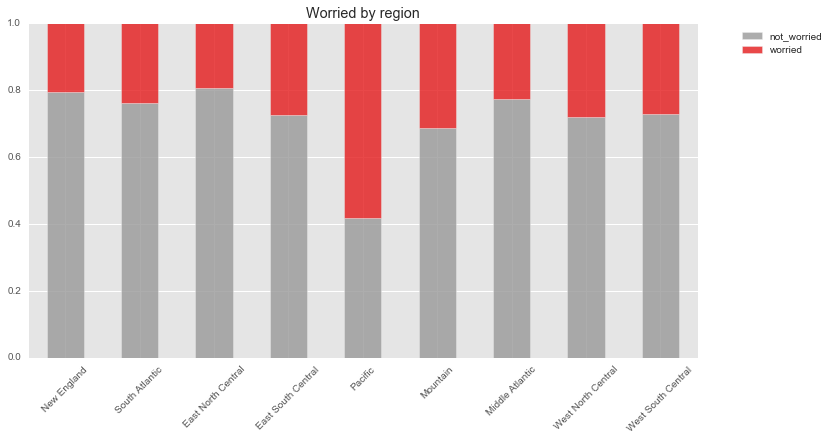

In [46]:
ax = worried_region.plot(
    kind='bar',
    stacked=True, 
    figsize=(12,6),
    title='Worried by region', 
    colormap='Set1_r',
    alpha=0.8
)
ax.set_xticklabels(worried_region["region"], rotation=45)
ax.legend(bbox_to_anchor=(1.2, 1))

In [47]:
worried = data_worried["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(sort=False).to_dict()
both = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(sort=False).to_dict()
frac = {}
for k in worried:
    frac[k] = worried[k] / both[k]
    
w = { 'income': list(frac),
      'not_worried': [1-frac[k] for k in list(frac)],
      'worried': [frac[k] for k in list(frac)] }

worried_income = pd.DataFrame(w, columns=['income','not_worried','worried'])

worried_income["income"] = pd.Categorical(worried_income["income"], 
                        ['Prefer not to answer',
                         '$0 to $9,999',
                         '$10,000 to $24,999',
                         '$25,000 to $49,999',
                         '$50,000 to $74,999',
                         '$75,000 to $99,999',
                         '$100,000 to $124,999',
                         '$125,000 to $149,999',
                         '$150,000 to $174,999',
                         '$175,000 to $199,999',
                         '$200,000 and up'])
worried_income = worried_income.sort_values(by="income")
worried_income

,income,not_worried,worried
6,Prefer not to answer,0.668831,0.331169
3,"$0 to $9,999",0.571429,0.428571
1,"$10,000 to $24,999",0.638554,0.361446
0,"$25,000 to $49,999",0.689873,0.310127
2,"$50,000 to $74,999",0.701149,0.298851
5,"$75,000 to $99,999",0.684211,0.315789
4,"$100,000 to $124,999",0.756757,0.243243
9,"$125,000 to $149,999",0.750000,0.250000
10,"$150,000 to $174,999",0.727273,0.272727
8,"$175,000 to $199,999",0.750000,0.250000


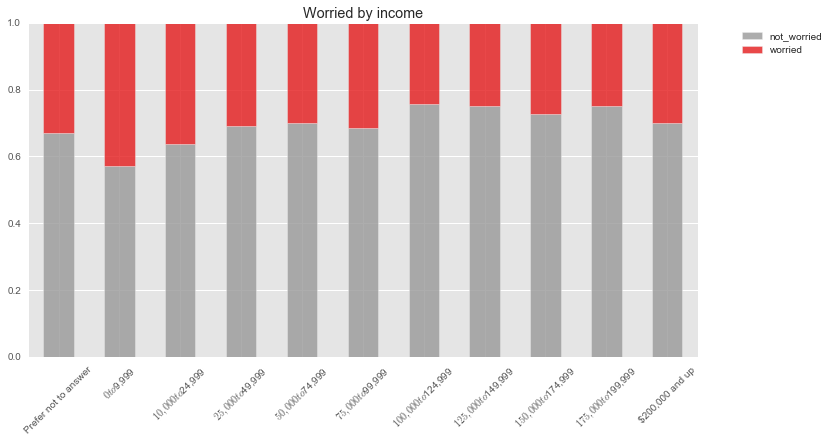

In [48]:
ax = worried_income.plot(
    kind='bar',
    stacked=True, 
    figsize=(12,6),
    title='Worried by income', 
    colormap='Set1_r',
    alpha=0.8
)
ax.set_xticklabels(worried_income["income"], rotation=45)
ax.legend(bbox_to_anchor=(1.2, 1))

### Poziom obaw w zależności od zarobków

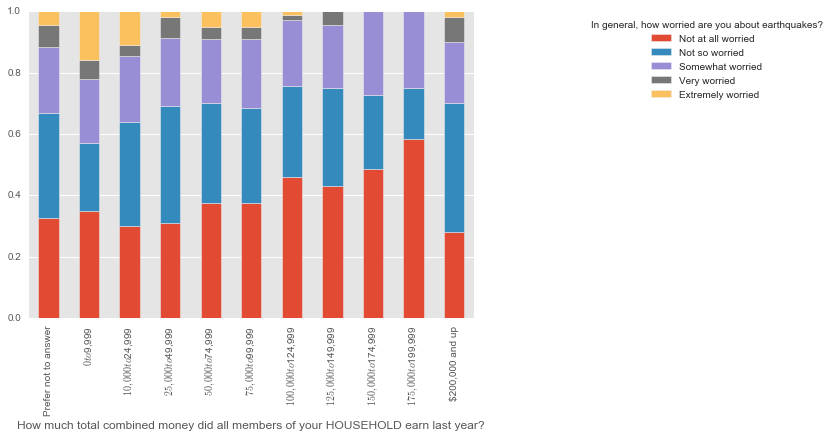

In [128]:
piv = pd.pivot_table(
    data, 
    index='How much total combined money did all members of your HOUSEHOLD earn last year?', 
    columns='In general, how worried are you about earthquakes?',
    values='US Region',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.8, 1), title=piv.columns.name)

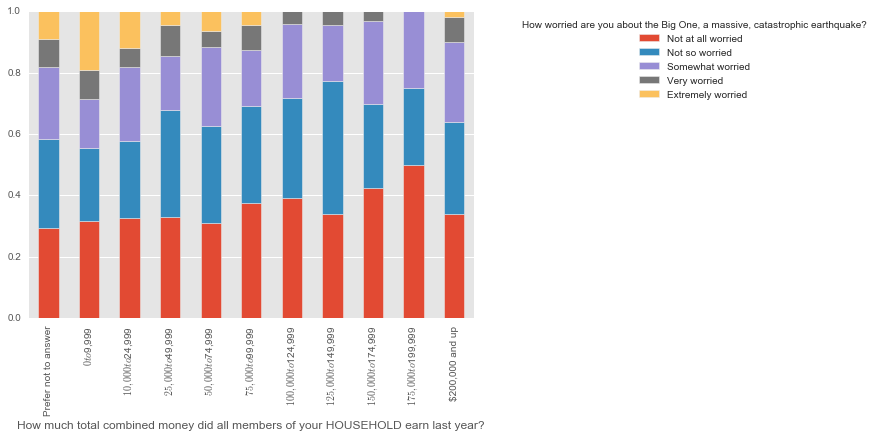

In [126]:
piv = pd.pivot_table(
    data, 
    index='How much total combined money did all members of your HOUSEHOLD earn last year?', 
    columns='How worried are you about the Big One, a massive, catastrophic earthquake?',
    values='US Region',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.9, 1), title=piv.columns.name)

Widać pewną zależność, choć niezbyt wyraźną - ludzie bogatsi mimo wszystko mniej przejmują się ryzykiem trzęsień ziemi. Ten trend znika jednak u ludzi bardzo bogatych (powyżej $200k na gospodarstwo domowe), których obawy wyraźnie wzrastają. Trudno a priori ocenić z czego to może wynikać.

### Poziom obaw w zależności od wieku

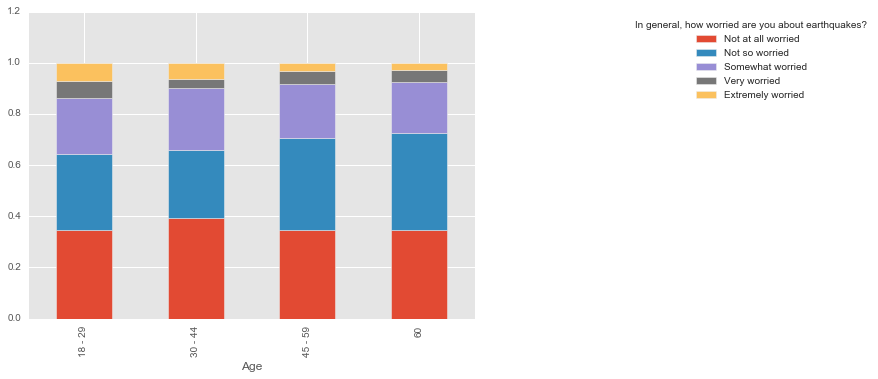

In [130]:
piv = pd.pivot_table(
    data, 
    index='Age', 
    columns='In general, how worried are you about earthquakes?',
    values='US Region',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.9, 1), title=piv.columns.name)

### Przygotowania do trzęsienia ziemi w różnych regionach USA

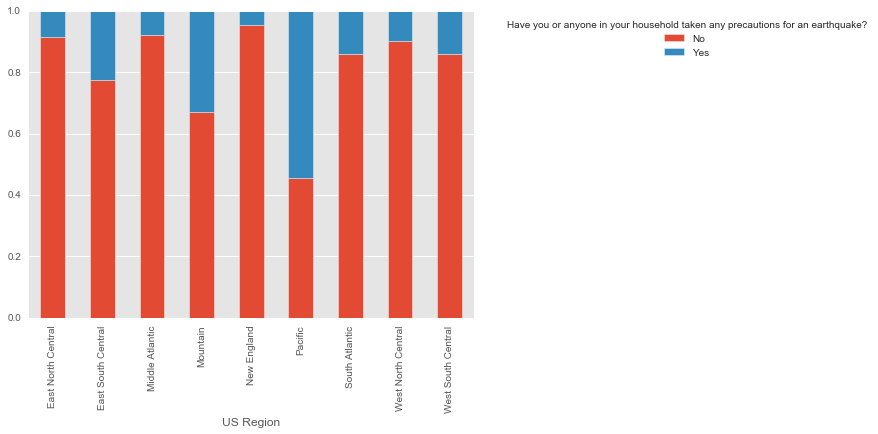

In [155]:
piv = pd.pivot_table(
    data, 
    index='US Region', 
    columns='Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?',
    values='Age',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.9, 1), title="Have you or anyone in your household taken any precautions for an earthquake?")

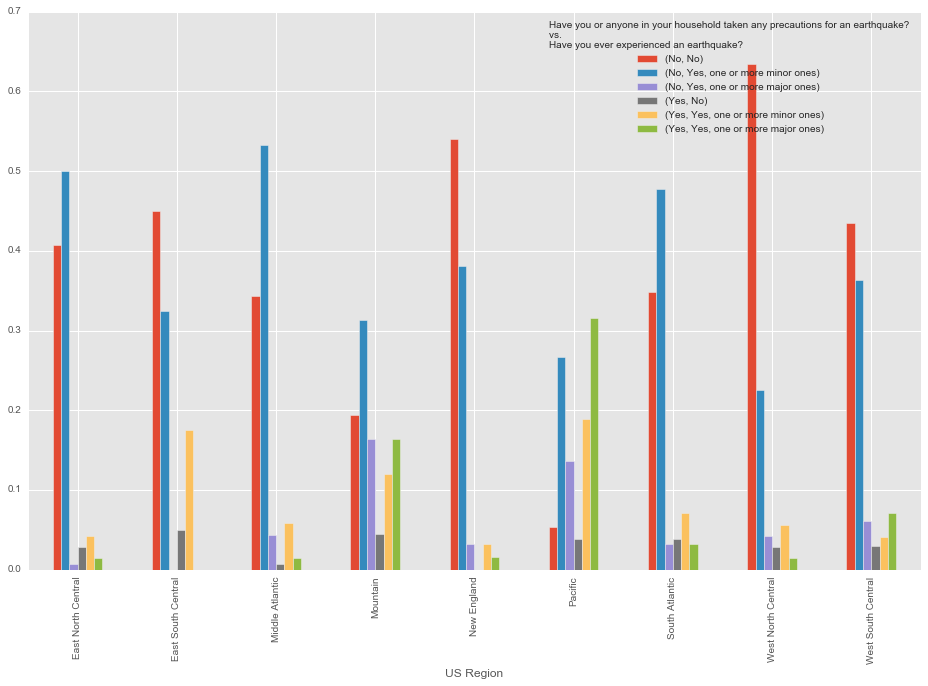

In [156]:
piv = pd.pivot_table(
    data, 
    index='US Region', 
    columns=[
        'Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?',
        'Have you ever experienced an earthquake?'],
    values='Age',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=False, figsize=(16,10))
ax.legend(title="Have you or anyone in your household taken any precautions for an earthquake? \nvs. \nHave you ever experienced an earthquake?")

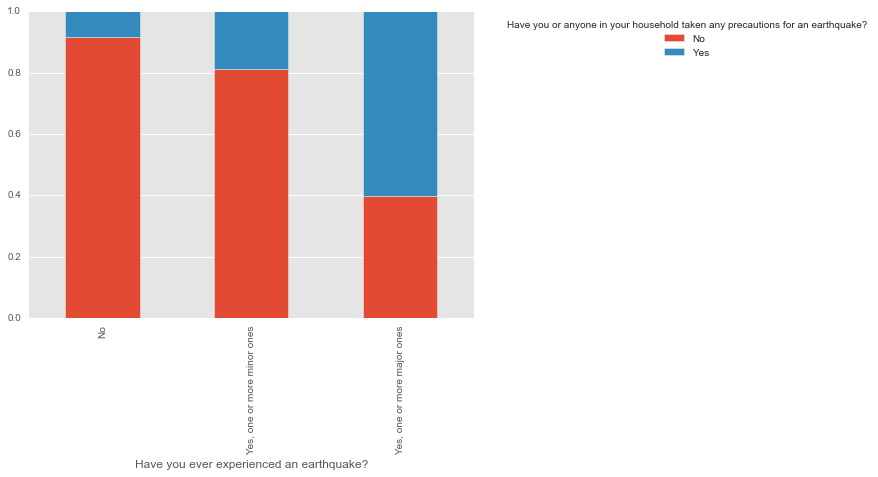

In [158]:
piv = pd.pivot_table(
    data, 
    index='Have you ever experienced an earthquake?', 
    columns='Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?',
    values='US Region',
    aggfunc='count',
    fill_value=0
)
piv_frac = deepcopy(piv)
for i in range(piv.shape[0]):
    s = piv_frac.iloc[i,:].sum()
    piv_frac.iloc[i,:] = piv_frac.iloc[i,:].apply(lambda x: x/s)
    
ax = piv_frac.plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.9, 1), title='Have you or anyone in your household taken any precautions for an earthquake?')

# Klastrowanie

***

Ze względu na charakter danych klastrowanie może być trochę problematyczne. Większość algorytmów chciałoby dostać dane numeryczne. Większość cech jest jednak porządkowych, więc po zamienieniu jedynej niebinarnej nominalnej cechy na dummy variables myślę że możemy spróbować k-meansa.

To pewne nadużycie. Lepszym wyjściem byłoby prawdopodobnie coś w rodzaju k-modes (albo k-prototypes?). Niestety nie są zaimplementowane w scikicie. Znalazłem co prawda jakąś implementację na githubie, ale nie chce mi działać. Na potrzeby tego ćwiczenia spróbuję więc użyć k-means. 

Dane nie mają porównywalnej skali, więc wydaje mi się że rozsądnym wyjściem będzie je przeskalować.

In [61]:
X_names = X.columns
X_unscaled = deepcopy(X)
X = preprocessing.scale(X)
X = pd.DataFrame(X, columns=X_names)

In [50]:
X.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region_0,US Region_1,US Region_2,US Region_3,US Region_4,US Region_5,US Region_6,US Region_7,US Region_8
0,-1.006672,-0.184067,-0.863961,0.288195,-0.526082,-0.184126,-0.454333,-1.449758,-1.050346,-1.417372,-0.408735,-0.206504,-0.403610,-0.271193,3.811012,-0.516565,-0.433976,-0.279786,-0.335601
1,0.823300,1.530385,-0.863961,0.288195,-0.526082,-1.958265,-1.236618,-1.449758,-1.050346,0.461953,2.446572,-0.206504,-0.403610,-0.271193,-0.262398,-0.516565,-0.433976,-0.279786,-0.335601
2,-0.091686,0.673159,-0.863961,0.288195,-0.526082,0.702944,0.327952,-1.449758,-1.050346,-0.665642,-0.408735,-0.206504,-0.403610,-0.271193,-0.262398,1.935865,-0.433976,-0.279786,-0.335601
3,-0.091686,-0.184067,-0.863961,0.288195,-0.526082,0.702944,-0.454333,-1.449758,-1.050346,-0.289777,-0.408735,-0.206504,-0.403610,-0.271193,-0.262398,-0.516565,-0.433976,-0.279786,2.979729
4,-0.091686,-0.184067,1.157460,0.288195,-0.526082,-0.184126,1.892521,-1.449758,-1.050346,2.341277,-0.408735,-0.206504,2.477637,-0.271193,-0.262398,-0.516565,-0.433976,-0.279786,-0.335601


Sprawdźmy, czy są szanse na jakiś sensowny scatterplot dla naszych danych.

In [51]:
X.shape

(978, 19)

[ 0.          0.          0.25585727  0.32210671  0.38477163  0.44650963
  0.50659847  0.56524991  0.62328538  0.67968462  0.73552479  0.78890387
  0.83378414  0.87639507  0.91187199  0.94329113  0.96954006  0.9913772   1.        ]


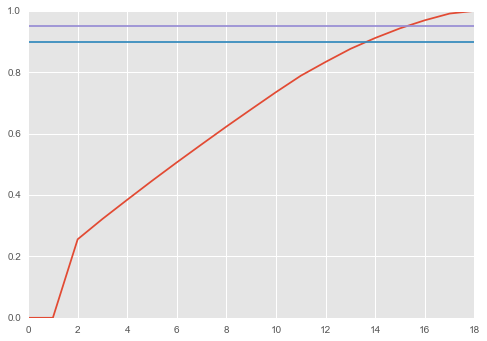

In [52]:
var_expl = np.zeros(19)
for n in range(2,19):
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)
    var_expl[n] = pca.explained_variance_ratio_.sum()
print(var_expl)
pd.Series(var_expl).plot()
# progi wyjaśniania zmienności
pd.Series([.9]*19).plot()
pd.Series([.95]*19).plot()

Wniosek: aby wyjaśnić około 90% zmienności potrzebujemy jakichś 13 wymiarów. Redukcja nie ma więc wielkiego sensu, rysowanie scatterplota chyba tym bardziej (zupełnie nie byłby miarodajny). Trudno.

***

Spróbuję metodą silhouette wyznaczyć optymalną ilość klastrów.

In [53]:
silhouette_kmeans = np.zeros(20)
for n in range(2,20):
      
    km = KMeans(n_clusters=n, n_init=20)
    clusters = km.fit_predict(X)

    silhouette_kmeans[n] = metrics.silhouette_score(X, clusters)

silhouette_kmeans

array([ 0.        ,  0.        ,  0.1237391 ,  0.10327546,  0.13697075,
        0.16147002,  0.19734297,  0.23130555,  0.26700352,  0.29512346,
        0.26767882,  0.26514019,  0.24443211,  0.22143693,  0.21443429,
        0.19609726,  0.20599585,  0.18139458,  0.19196356,  0.16962928])

Wygląda więc na to, że wyraźnie najlepsze będzie użycie dziewięciu klastrów. To sporo, ale wypada zaufać obliczeniom.

Sprawdzimy jeszcze jak sobie radzi klastrowanie aglomeratywne.

In [54]:
silhouette_agglomerative = np.zeros(20)
for n in range(2,20):
      
    ac = AgglomerativeClustering(n_clusters=n)
    clusters = ac.fit_predict(X)

    silhouette_agglomerative[n] = metrics.silhouette_score(X, clusters)

silhouette_agglomerative

array([ 0.        ,  0.        ,  0.08763327,  0.1127717 ,  0.13086284,
        0.15771933,  0.19137278,  0.22964101,  0.26078993,  0.28901522,
        0.26027426,  0.25939144,  0.24856038,  0.22607555,  0.2034903 ,
        0.19488935,  0.1851282 ,  0.17462216,  0.16731589,  0.16772255])

Z odległością cosinusową:

In [55]:
silhouette_agglomerative_average = np.zeros(20)
for n in range(2,20):
      
    ac = AgglomerativeClustering(n_clusters=n, affinity='cosine', linkage='average')
    clusters = ac.fit_predict(X)

    silhouette_agglomerative_average[n] = metrics.silhouette_score(X, clusters)

silhouette_agglomerative_average

array([ 0.        ,  0.        ,  0.10364576,  0.09240327,  0.12962877,
        0.16588757,  0.19710726,  0.23631838,  0.26325316,  0.29539616,
        0.26174162,  0.24690282,  0.22518708,  0.2166079 ,  0.2060188 ,
        0.20133308,  0.19030771,  0.19682185,  0.1952651 ,  0.19069599])

In [56]:
silhouette_agglomerative_complete = np.zeros(20)
for n in range(2,20):
      
    ac = AgglomerativeClustering(n_clusters=n, affinity='cosine', linkage='complete')
    clusters = ac.fit_predict(X)

    silhouette_agglomerative_complete[n] = metrics.silhouette_score(X, clusters)

silhouette_agglomerative_complete

array([ 0.        ,  0.        ,  0.09049951,  0.09719077,  0.12828422,
        0.17030094,  0.20236448,  0.23677779,  0.26732096,  0.22049207,
        0.21077432,  0.19576941,  0.22468825,  0.20926313,  0.19649676,
        0.19094156,  0.1884767 ,  0.19064511,  0.18396853,  0.17679637])

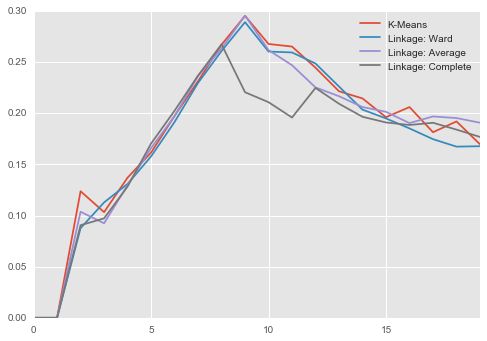

In [57]:
silhouette_scores = pd.DataFrame()
silhouette_scores['K-Means'] = pd.Series(silhouette_kmeans)
silhouette_scores['Linkage: Ward'] = pd.Series(silhouette_agglomerative)
silhouette_scores['Linkage: Average'] = pd.Series(silhouette_agglomerative_average)
silhouette_scores['Linkage: Complete'] = pd.Series(silhouette_agglomerative_complete)
silhouette_scores.plot(subplots=False)

Jak widać algorytm aglomeratywny radzi sobie podobnie jak k-means, można też przypuszczać, że kształty klastrów są podobne, bo wykresy silhouette są prawie identyczne. Maksimum silhouette jest też wyraźnie widoczne i prawie niezmienne. Wynik 0.3 nie jest co prawda zbyt dobry, ale chyba nic lepszego w tej chwili nie osiągnę.

*Można by jeszcze sprawdzić np. DBSCAN z jakąś odpowiednią dla dyskretnych danych miarą odległości. Niestety nie udało mi się go uruchomić tak żeby robił cokolwiek interesującego, nie bardzo wiem co robię źle:*

In [69]:
db = DBSCAN(metric='hamming', eps=5)
clusters = db.fit_predict(X_unscaled)
pd.Series(clusters).unique()

array([0])

## Interpretacja

***

Zostaję wobec tego przy pierwszym klastrowaniu (k-meansem) i 9 klastrach.

In [175]:
km = KMeans(n_clusters=9, n_init=20)
clusters = km.fit_predict(X)

Dodaję do danych numery klastrów jako dodatkową kolumnę, żeby łatwiej je zwizualizować.

In [185]:
data_kmeans = deepcopy(data)
cls = pd.Series(clusters)
cls = cls.astype('category')
data_kmeans = data_kmeans.set_index(cls.index)
data_kmeans['cluster'] = cls

In [187]:
data_kmeans.head()

,"In general, how worried are you about earthquakes?","How worried are you about the Big One, a massive, catastrophic earthquake?",Do you think the Big One will occur in your lifetime?,Have you ever experienced an earthquake?,"Have you or anyone in your household taken any precautions for an earthquake (packed an earthquake survival kit, prepared an evacuation plan, etc.)?",How familiar are you with the San Andreas Fault line?,How familiar are you with the Yellowstone Supervolcano?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,cluster
0,Not at all worried,Not so worried,No,"Yes, one or more minor ones",No,Somewhat familiar,Not so familiar,18 - 29,Male,Prefer not to answer,New England,7
1,Somewhat worried,Very worried,No,"Yes, one or more minor ones",No,Not at all familiar,Not at all familiar,18 - 29,Male,"$75,000 to $99,999",East North Central,5
2,Not so worried,Somewhat worried,No,"Yes, one or more minor ones",No,Very familiar,Somewhat familiar,18 - 29,Male,"$10,000 to $24,999",Pacific,4
3,Not so worried,Not so worried,No,"Yes, one or more minor ones",No,Very familiar,Not so familiar,18 - 29,Male,"$25,000 to $49,999",West South Central,2
4,Not so worried,Not so worried,Yes,"Yes, one or more minor ones",No,Somewhat familiar,Extremely familiar,18 - 29,Male,"$200,000 and up",Middle Atlantic,1


Zacznijmy od liczności klastrów.

In [198]:
pd.Series(clusters).value_counts().sort_values()

3     40
7     63
8     67
6     71
2     99
1    136
5    139
0    155
4    208
dtype: int64

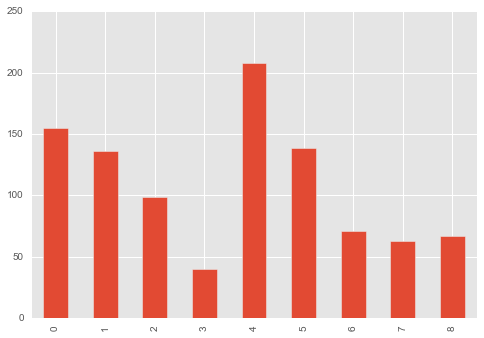

In [203]:
pd.Series(clusters).value_counts().sort_index().plot(kind='bar')

Sprawdźmy więc rozkład regionów USA w poszczególnych klastrach.

In [204]:
piv = pd.pivot_table(
    data_kmeans, 
    index='cluster', 
    columns='US Region', 
    values='Age',
    aggfunc='count',
    fill_value=0)
piv

US Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
cluster,,,,,,,,,
0,0,0,0,0,0,0,155,0,0
1,0,0,136,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,99
3,0,40,0,0,0,0,0,0,0
4,1,0,1,0,0,206,0,0,0
5,139,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,71,0
7,0,0,0,0,63,0,0,0,0
8,0,0,0,67,0,0,0,0,0


No cóż, jak widać klastry rozłożyły się idealnie według regionów, więc chyba nic ciekawego stąd nie wyciągniemy. Można ewentualnie spróbować zmniejszyć liczbę klastrów i zobaczyć, jak się wtedy pogrupują regiony. 

In [207]:
km = KMeans(n_clusters=6, n_init=20)
clusters = km.fit_predict(X)
data_kmeans = deepcopy(data)
cls = pd.Series(clusters)
cls = cls.astype('category')
data_kmeans = data_kmeans.set_index(cls.index)
data_kmeans['cluster'] = cls
piv = pd.pivot_table(
    data_kmeans, 
    index='cluster', 
    columns='US Region', 
    values='Age',
    aggfunc='count',
    fill_value=0)
piv

US Region,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
cluster,,,,,,,,,
0,0,0,0,0,0,0,0,0,99
1,2,5,1,0,3,203,7,4,0
2,0,35,0,0,60,3,148,0,0
3,0,0,136,0,0,0,0,0,0
4,138,0,0,0,0,0,0,67,0
5,0,0,0,67,0,0,0,0,0


Widać że np. East North Central i West North Central wpadają do tego samego klastra. Podobnie New England, East South Central i South Atlantic. Można by przedstawić to na mapie i spróbować z różną, coraz mniejszą ilością klastrów, jak będą się grupować (niestety nie potrafię tego zrobić tak od ręki). 

Myślę tez, że warto pamiętać, że to łączenie klastrów jest już trochę sztuczne. Wartość silhouette od początku nie była zbyt wysoka, a dla mniejszej ilości klastrów będzie jeszcze znacząco spadać. Tak połączone klastry będą więc silnie wewnętrznie zróżnicowane.

Generalnie jedyne chyba wnioski, jakie mozna wyciągnąć z tego klastrowania bez dodatkowych danych, są dosyć trywialne: podejście i nawyki związane z trzęsieniami ziemi są mocno zależne od regionu, w którym się mieszka. Biorąc pod uwagę, że częstotliwość trzęsień ziemi też zależy od regionu, nie jest to nic odkrywczego. Być może dałoby się wywnioskować coś ciekawszego, gdybyśmy mieli więcej zmiennych do analizy.